In [830]:
import numpy as np
import pandas as pd
import requests
from pykrx import stock
import time
from datetime import datetime

In [831]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager, rc
import platform
if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus'] = False
stock_list = pd.DataFrame({'종목코드':stock.get_market_ticker_list(market="ALL")})
stock_list['종목명'] = stock_list['종목코드'].map(lambda x: stock.get_market_ticker_name(x))

In [832]:
stock_list = pd.DataFrame({'종목코드':stock.get_market_ticker_list(market="ALL")})
stock_list['종목명'] = stock_list['종목코드'].map(lambda x: stock.get_market_ticker_name(x))

In [833]:
stock_list.head()

,종목코드,종목명
0,060310,3S
1,095570,AJ네트웍스
2,006840,AK홀딩스
3,054620,APS홀딩스
4,265520,AP시스템


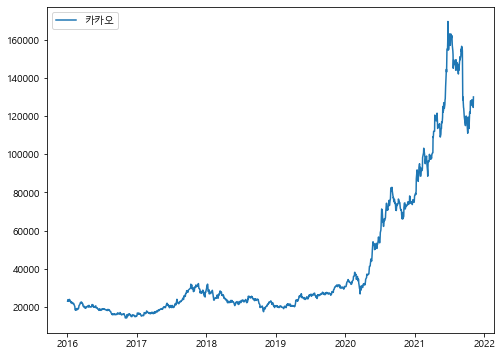

In [834]:
name = '카카오'
fromdate = str(20160101)
todate = str(20211104)

ticker1 = stock_list.loc[stock_list['종목명']== name, '종목코드']
df1 = stock.get_market_ohlcv_by_date(fromdate=fromdate, todate=todate, ticker=ticker1)

data = df1['종가']

plt.figure(figsize=(8, 6))
plt.plot(data)
plt.legend([f'{name}'])
plt.show()

In [835]:
seri = df1['종가']

In [836]:
df = pd.DataFrame(seri, columns=['종가','일계도','이계도','일계도부호','이계도부호','일계도비율'])
df.head()

,종가,일계도,이계도,일계도부호,이계도부호,일계도비율
날짜,,,,,,
2016-01-04,23142,NaN,NaN,NaN,NaN,NaN
2016-01-05,23503,NaN,NaN,NaN,NaN,NaN
2016-01-06,23905,NaN,NaN,NaN,NaN,NaN
2016-01-07,23544,NaN,NaN,NaN,NaN,NaN
2016-01-08,23122,NaN,NaN,NaN,NaN,NaN


In [837]:
df['일계도'][0] = 0
df.head()


C:\Users\ghdak\AppData\Local\Temp/ipykernel_8988/829604211.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['일계도'][0] = 0


,종가,일계도,이계도,일계도부호,이계도부호,일계도비율
날짜,,,,,,
2016-01-04,23142,0,NaN,NaN,NaN,NaN
2016-01-05,23503,NaN,NaN,NaN,NaN,NaN
2016-01-06,23905,NaN,NaN,NaN,NaN,NaN
2016-01-07,23544,NaN,NaN,NaN,NaN,NaN
2016-01-08,23122,NaN,NaN,NaN,NaN,NaN


In [838]:
for i in range(1, len(seri)):
    df['일계도'][i] = df['종가'][i] - df['종가'][i-1]
df.head()

C:\Users\ghdak\AppData\Local\Temp/ipykernel_8988/3311632609.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['일계도'][i] = df['종가'][i] - df['종가'][i-1]


,종가,일계도,이계도,일계도부호,이계도부호,일계도비율
날짜,,,,,,
2016-01-04,23142,0,NaN,NaN,NaN,NaN
2016-01-05,23503,361,NaN,NaN,NaN,NaN
2016-01-06,23905,402,NaN,NaN,NaN,NaN
2016-01-07,23544,-361,NaN,NaN,NaN,NaN
2016-01-08,23122,-422,NaN,NaN,NaN,NaN


In [839]:
df['이계도'][0] = 0
for i in range(1, len(seri)):
    df['이계도'][i] = df['일계도'][i] - df['일계도'][i-1]
df.head()

C:\Users\ghdak\AppData\Local\Temp/ipykernel_8988/3300555474.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['이계도'][0] = 0
C:\Users\ghdak\AppData\Local\Temp/ipykernel_8988/3300555474.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['이계도'][i] = df['일계도'][i] - df['일계도'][i-1]


,종가,일계도,이계도,일계도부호,이계도부호,일계도비율
날짜,,,,,,
2016-01-04,23142,0,0,NaN,NaN,NaN
2016-01-05,23503,361,361,NaN,NaN,NaN
2016-01-06,23905,402,41,NaN,NaN,NaN
2016-01-07,23544,-361,-763,NaN,NaN,NaN
2016-01-08,23122,-422,-61,NaN,NaN,NaN


In [840]:
for i in range(len(df)):
    if df['일계도'][i] >= 0:
        df['일계도부호'][i] = 1
    else:
        df['일계도부호'][i] = 0

C:\Users\ghdak\AppData\Local\Temp/ipykernel_8988/2770070508.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['일계도부호'][i] = 1
C:\Users\ghdak\AppData\Local\Temp/ipykernel_8988/2770070508.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['일계도부호'][i] = 0


In [841]:
for i in range(len(df)):
    if df['이계도'][i] >= 0:
        df['이계도부호'][i] = 1
    else:
        df['이계도부호'][i] = 0

C:\Users\ghdak\AppData\Local\Temp/ipykernel_8988/3065516705.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['이계도부호'][i] = 1
C:\Users\ghdak\AppData\Local\Temp/ipykernel_8988/3065516705.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['이계도부호'][i] = 0


In [842]:
df['일계도비율'][0] = 0
for i in range(1, len(seri)):
    df['일계도비율'][i] = (1-(df['종가'][i-1] / df['종가'][i]))*100
df.head()

C:\Users\ghdak\AppData\Local\Temp/ipykernel_8988/2556911977.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['일계도비율'][0] = 0
C:\Users\ghdak\AppData\Local\Temp/ipykernel_8988/2556911977.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['일계도비율'][i] = (1-(df['종가'][i-1] / df['종가'][i]))*100


,종가,일계도,이계도,일계도부호,이계도부호,일계도비율
날짜,,,,,,
2016-01-04,23142,0,0,1,1,0
2016-01-05,23503,361,361,1,1,1.535974
2016-01-06,23905,402,41,1,1,1.681657
2016-01-07,23544,-361,-763,0,0,-1.533299
2016-01-08,23122,-422,-61,0,0,-1.825102


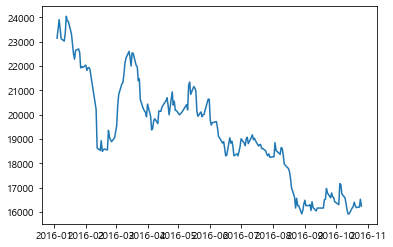

In [843]:
plt.plot(df['종가'][:200])

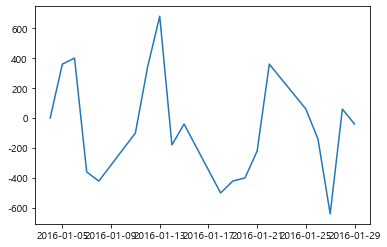

In [844]:
plt.plot(df['일계도'][:20])

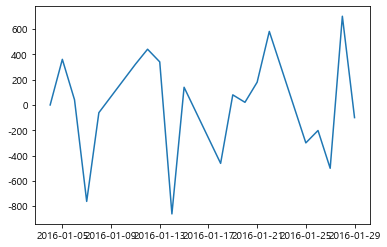

In [845]:
plt.plot(df['이계도'][:20])

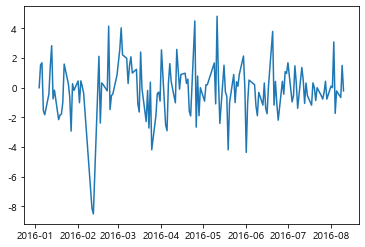

In [846]:
plt.plot(df['일계도비율'][:150])

In [847]:
import pickle
# 선형회귀 모델
from sklearn import linear_model
# 학습 데이터와 테스트 데이터를 나눠주는 모듈
from sklearn.model_selection import train_test_split
# 모델을 평가해주는 모듈
from sklearn.metrics import mean_absolute_error

In [848]:
df_diff1 = df['일계도']

In [849]:
df_diff1 = np.array(df_diff1)

In [850]:
df_diff1.shape

(1435,)

In [851]:
data_x = [df_diff1[i:i+50] for i in range(1350)]
data_y = [df_diff1[i+51] for i in range(1350)]

In [852]:
train_x, test_x, train_y, test_y = train_test_split(
    data_x, data_y, test_size=0.2, random_state=5)

In [853]:
len(train_x)

1080

In [854]:
train_y[:5]

[8500, 301, -702, 5519, 121]

In [855]:
train_x[:2]

[array([-3412, 100, 803, 3312, -1506, 101, 401, 803, 5720, 2509, 2409,
        -1004, -1605, 602, -2710, -702, -2710, 2208, 702, 703, 401, -2308,
        -2208, -3412, -2609, 3813, 3814, 401, -401, 0, 1204, 2609, -1103,
        301, -703, 301, -1405, 2007, -1505, 1204, 903, 201, 402, 200, 8430,
        -401, 1204, 2008, 0, 0], dtype=object),
 array([-401, -20, -141, -40, 502, -101, -261, -261, 322, 40, 180, 241,
        101, -141, -361, -241, 60, 121, -201, 60, 783, -261, 40, -281, 422,
        -342, 161, 40, 422, 160, 60, -180, -201, 723, -161, 40, 121, 361,
        -241, -201, 442, 281, 201, -201, 241, 120, -401, 281, 0, 0],
       dtype=object)]

In [856]:
# 3. 데이터 분석 : 선형 회귀 모델
model = linear_model.LinearRegression()

In [857]:
model.fit(train_x, train_y)

C:\Users\ghdak\anaconda3\envs\gpu_env\lib\site-packages\sklearn\utils\validation.py:956: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(


LinearRegression()

In [858]:
test_x[:2]

[array([-903, 803, -201, -502, 201, -602, -401, 2509, -703, 301, -702,
        -201, 2308, 1004, 1304, -602, 502, 1405, 6323, 3813, 903, -602,
        -602, -2810, -2007, 2509, 803, 2007, 1806, 2108, -2509, 803, -1405,
        -3412, 100, 803, 3312, -1506, 101, 401, 803, 5720, 2509, 2409,
        -1004, -1605, 602, -2710, -702, -2710], dtype=object),
 array([-802, 301, 501, -100, -602, 0, -201, 101, -201, -803, 0, -803,
        -100, 200, 703, 702, 0, 302, 200, 0, -401, -502, -401, -201, 301,
        -201, 1405, 0, -401, -201, 100, 603, -603, 502, 602, -100, -401,
        602, -101, -100, 201, 100, -301, -502, -200, 200, 201, 100, 301,
        201], dtype=object)]

In [859]:
test_y[:5]

[702, 401, 101, 101, -402]

In [860]:
pred_y = model.predict(test_x)
pred_y[:10]

C:\Users\ghdak\anaconda3\envs\gpu_env\lib\site-packages\sklearn\base.py:561: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


array([  471.04199043,  -268.4495537 ,   -11.57699917,   -56.50909985,
         476.06287313,  -748.61822245,  -127.49866455,    -9.45410346,
       -1217.43768893,   138.55859475])

In [861]:
trans_pred = pred_y.copy()
# for i in range(len(pred_y)):
#     if pred_y[i] < 0.5:
#         trans_pred[i] = 0
#     else:
#         trans_pred[i] = 1

In [862]:
from sklearn.metrics import mean_squared_error

In [863]:
mae = mean_absolute_error(test_y, trans_pred)
mse = mean_squared_error(test_y, trans_pred)
round(mae, 2), round(mse, 2)

(831.95, 2197673.21)

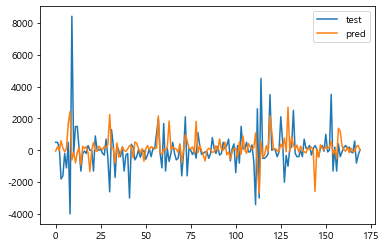

In [864]:
plt.plot(test_y[100:300])
plt.plot(trans_pred[100:300])
plt.legend(['test','pred'])
plt.show()

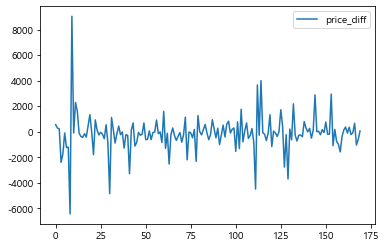

In [865]:
plt.plot(np.array(test_y[100:300]) - np.array(trans_pred[100:300]))
plt.legend(['price_diff'])
plt.show()

In [866]:
df[10:15]

,종가,일계도,이계도,일계도부호,이계도부호,일계도비율
날짜,,,,,,
2016-01-18,23323,-502,-462,0,0,-2.152382
2016-01-19,22901,-422,80,0,1,-1.842714
2016-01-20,22500,-401,21,0,1,-1.782222
2016-01-21,22279,-221,180,0,1,-0.991966
2016-01-22,22640,361,582,1,1,1.594523


In [917]:
df_diff1 = df['일계도비율']
df_diff1 = np.array(df_diff1)
data_x = np.array([np.array(df_diff1[i:i+20]) for i in range(1350)])
data_y = np.array([df_diff1[i+21] for i in range(1350)])
data_x1 = data_x.copy()
data_y1 = data_y.copy()

for i in range(len(data_x)):
    for j in range(len(data_x1[i])):
        data_x1[i][j] =  data_x[i][j]*(i+1)/20

for i in range(len(data_y)):
    data_y1[i] = data_y[i] / 10 

train_x, test_x, train_y, test_y = train_test_split(
    data_x, data_y, test_size=0.3, random_state=3)

model = linear_model.LinearRegression()
model.fit(train_x, train_y)
pred_y = model.predict(test_x) * 5
trans_pred = np.array(pred_y.copy())

mae = mean_absolute_error(test_y, trans_pred)  # mae=mse (output=0,1)

round(mae, 2)

1.88

In [918]:
pred_y

array([ 3.83553254e-01,  2.03763775e-01,  3.96476101e-01, -9.58515441e-01,
        1.46986960e+00,  3.50322456e+00,  1.02890849e-01,  8.20279896e-01,
        1.52835396e+00, -1.39850003e+00, -3.06752446e-01, -2.22044671e-01,
        1.45861760e-03, -3.89101190e-01,  7.90526295e-01,  1.59344221e-02,
        1.62198406e+00, -4.76696261e-01, -1.81022371e-01,  1.59217764e+00,
        3.86020890e+00,  1.98880459e+00,  1.08421398e+00,  2.69617453e-01,
        2.40868122e+00,  8.00565185e-01,  3.63426640e+00,  2.04896242e+00,
        6.65397998e-01,  1.00021412e+00, -6.14216780e-01,  7.15136792e-01,
        7.73143961e-01, -3.83415566e-01, -1.79340357e+00,  6.05314311e-02,
        1.71933765e+00,  1.40026302e+00,  1.25969894e+00,  1.38359866e+00,
        1.03720799e+00,  8.58637857e-01,  7.99143725e-01, -1.55972006e+00,
       -7.14476715e-01,  1.09533693e+00, -5.97974558e-01, -7.58951211e-02,
        1.00389950e+00,  2.18925339e-01,  5.84933906e-01,  4.41064305e-01,
        6.06062996e-01,  

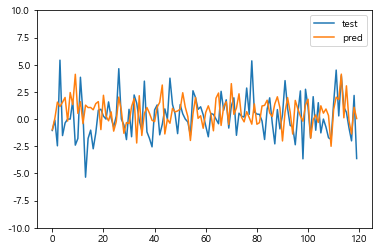

In [919]:
plt.plot(np.array(test_y[100:220]))
plt.plot(np.array(trans_pred[100:220]))
plt.legend(['test','pred'])
plt.ylim([-10,10])
plt.show()

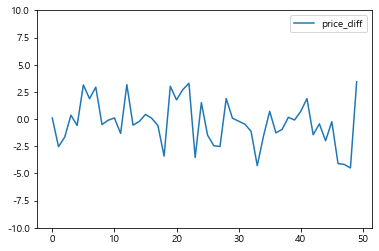

In [880]:
plt.plot(np.array(test_y[250:300]) - np.array(trans_pred[250:300])*4)
plt.legend(['price_diff'])
plt.ylim([-10,10])
plt.show()

In [920]:
from statsmodels.tsa.stattools import coint
score, pvalue, _ = coint(pred_y,test_y)
pvalue

0.0